# Predicting Healthcare Insurance Costs using Machine Learning.

In the complex world of healthcare, where costs are soaring, I'm on a mission to harness the power of data. By analyzing factors like age, gender, BMI, and more, I aim to predict medical costs, empowering individuals and healthcare providers. Collaboration with experts and data-driven insights drives our journey toward a more affordable and efficient healthcare system.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
n = pd.read_csv("insurance.csv")

In [3]:
n.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
n.duplicated().sum()

1

In [5]:
n = n.drop_duplicates()

In [6]:
n.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
lab_encode = LabelEncoder()

n['sex'] = lab_encode.fit_transform(n['sex'])
n['smoker'] = lab_encode.fit_transform(n['smoker'])

In [8]:
region_dummies = pd.get_dummies(n['region'], prefix='region')
n = pd.concat([n, region_dummies], axis=1)
n = n.drop('region', axis=1)

In [9]:
n.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [10]:
from sklearn.model_selection import train_test_split


X = n.drop('charges', axis=1)
y = n['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rand_forest_model = RandomForestRegressor(n_estimators=50, n_jobs=2, random_state=42)

scores = cross_val_score(rand_forest_model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)

rmse_values = np.sqrt(-scores)
std = np.std(rmse_values)

print("Cross-Validation Results:")
print("RMSE values for each fold:", rmse_values)
print("Mean RMSE:", np.mean(rmse_values))
print("Standard Deviation of RMSE:", std)


Cross-Validation Results:
RMSE values for each fold: [5236.8564584  5590.19844975 4276.32833592 5391.43005712 5461.77086147
 3879.35166638 5319.27260635 4193.85063882 5378.22765284 4879.82378301]
Mean RMSE: 4960.711051006691
Standard Deviation of RMSE: 586.8826484248


In [12]:
rand_forest_model.fit(X_train, y_train)

predictions = rand_forest_model.predict(X_test)

rounded_predictions = np.round(predictions, 2)

compare = pd.DataFrame({
    'Actual Charges': np.round(y_test.values[:10], 2),
    'Predicted Charges': rounded_predictions[:10]
})

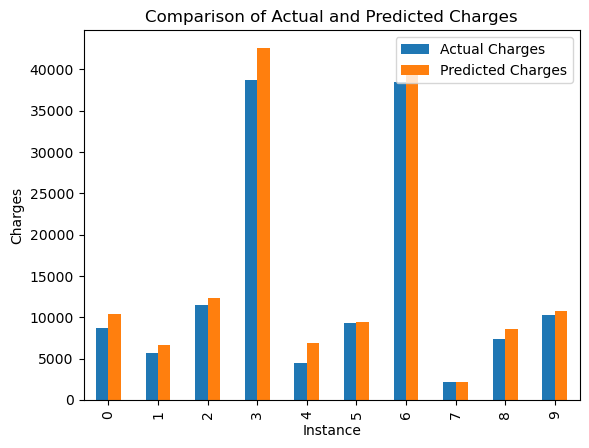

In [13]:
compare.plot(kind='bar')
plt.xlabel('Instance')
plt.ylabel('Charges')
plt.title('Comparison of Actual and Predicted Charges')
plt.show()

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import make_scorer
import numpy as np

decision_tree_model = DecisionTreeRegressor(random_state=42)

neg_mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

cv_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=10, scoring=neg_mse_scorer)

rmse_scores = np.sqrt(-cv_scores)

r2_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=10)

print("Cross-Validation Results:")
print("RMSE scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())
print("R2 scores:", r2_scores)
print("Mean R2:", r2_scores.mean())

Cross-Validation Results:
RMSE scores: [6172.94991934 7007.2016347  6535.36851048 7346.47342905 8034.20799568
 3963.63976505 7290.42282486 6532.53052874 7828.606615   6054.82897034]
Mean RMSE: 6676.62301932406
R2 scores: [0.7505214  0.6753853  0.59433921 0.66981861 0.52851178 0.84987045
 0.58360042 0.6679455  0.54519772 0.76485577]
Mean R2: 0.6630046164938866


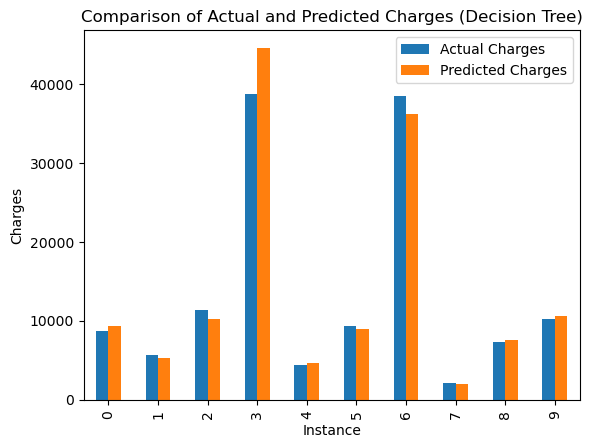

In [15]:
decision_tree_model = DecisionTreeRegressor(random_state=42)

decision_tree_model.fit(X_train, y_train)

predictions = decision_tree_model.predict(X_test)

rounded_predictions = np.round(predictions, 2)

compare = pd.DataFrame({
    'Actual Charges': np.round(y_test.values[:10], 2),
    'Predicted Charges': rounded_predictions[:10]
})

compare.plot(kind='bar')
plt.xlabel('Instance')
plt.ylabel('Charges')
plt.title('Comparison of Actual and Predicted Charges (Decision Tree)')
plt.show()

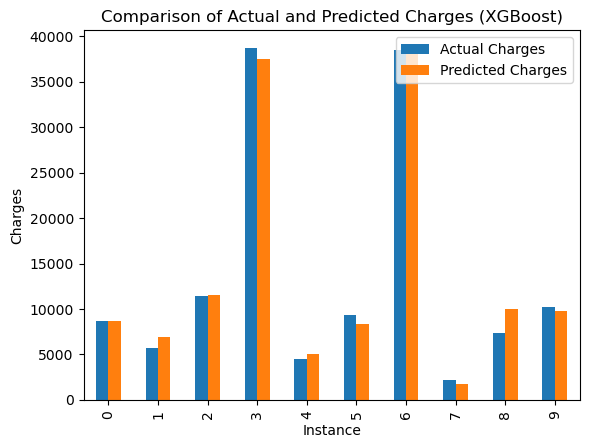

In [16]:
import xgboost as xgb

xgboost_model = xgb.XGBRegressor()

xgboost_model.fit(X_train, y_train)

predictions = xgboost_model.predict(X_test)

compare = pd.DataFrame({
    'Actual Charges': np.round(y_test.values[:10], 2),
    'Predicted Charges': np.round(predictions[:10], 2)
})

compare.plot(kind='bar')
plt.xlabel('Instance')
plt.ylabel('Charges')
plt.title('Comparison of Actual and Predicted Charges (XGBoost)')
plt.show()

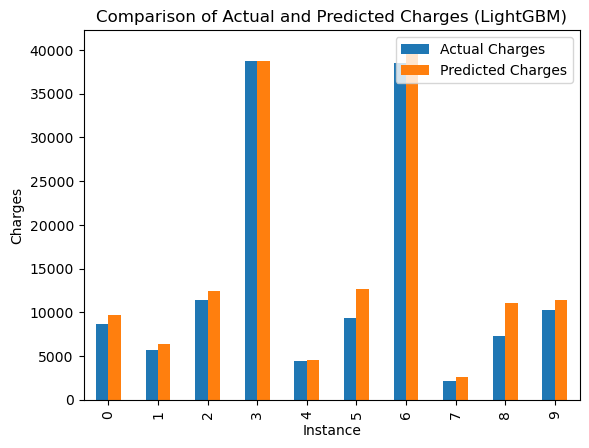

In [17]:
import lightgbm as lgb

lightgbm_model = lgb.LGBMRegressor()

lightgbm_model.fit(X_train, y_train)

predictions = lightgbm_model.predict(X_test)

compare = pd.DataFrame({
    'Actual Charges': np.round(y_test.values[:10], 2),
    'Predicted Charges': np.round(predictions[:10], 2)
})

compare.plot(kind='bar')
plt.xlabel('Instance')
plt.ylabel('Charges')
plt.title('Comparison of Actual and Predicted Charges (LightGBM)')
plt.show()